In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/energy-consumption-time-series-dataset/KwhConsumptionBlower78_1.csv')
print(df.head())

   Unnamed: 0      TxnDate   TxnTime  Consumption
0       76229  01 Jan 2022  16:55:52        1.010
1       76258  01 Jan 2022  21:45:29        0.908
2       76287  01 Jan 2022  12:24:52        0.926
3       76316  01 Jan 2022  04:07:36        0.928
4       76345  01 Jan 2022  06:52:25        0.916


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1228 non-null   int64  
 1   TxnDate      1228 non-null   object 
 2   TxnTime      1228 non-null   object 
 3   Consumption  1228 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 38.5+ KB


In [9]:
df['TxnDate'] = pd.to_datetime(df['TxnDate'])
reference_date = pd.to_datetime('2022-01-01')
df['Days_Since_Reference'] = (df['TxnDate'] - reference_date).dt.days

# Now, 'Days_Since_Reference' is a numeric column (float) representing the number of days.
print(df)

      Unnamed: 0    TxnDate   TxnTime  Consumption  Days_Since_Reference
0          76229 2022-01-01  16:55:52        1.010                     0
1          76258 2022-01-01  21:45:29        0.908                     0
2          76287 2022-01-01  12:24:52        0.926                     0
3          76316 2022-01-01  04:07:36        0.928                     0
4          76345 2022-01-01  06:52:25        0.916                     0
...          ...        ...       ...          ...                   ...
1223       97922 2022-01-20  21:43:55        5.128                    19
1224       97951 2022-01-20  09:43:03        5.924                    19
1225       97980 2022-01-20  03:06:05        4.664                    19
1226       98009 2022-01-20  06:16:38        3.474                    19
1227       98038 2022-01-20  16:48:03        2.478                    19

[1228 rows x 5 columns]


In [10]:
df['TxnTime'] = pd.to_datetime(df['TxnTime'])

# Extract hours, minutes, and seconds
df['Hour'] = df['TxnTime'].dt.hour
df['Minute'] = df['TxnTime'].dt.minute
df['Second'] = df['TxnTime'].dt.second

# Convert time values to a float representation, e.g., fractional hours since midnight
df['Time_Float'] = df['Hour'] + df['Minute'] / 60.0 + df['Second'] / 3600.0

# Drop the intermediate columns if not needed
df.drop(['Hour', 'Minute', 'Second'], axis=1, inplace=True)

# Now, 'Time_Float' is a float column representing time in fractional hours.
print(df)

      Unnamed: 0    TxnDate             TxnTime  Consumption  \
0          76229 2022-01-01 2023-10-09 16:55:52        1.010   
1          76258 2022-01-01 2023-10-09 21:45:29        0.908   
2          76287 2022-01-01 2023-10-09 12:24:52        0.926   
3          76316 2022-01-01 2023-10-09 04:07:36        0.928   
4          76345 2022-01-01 2023-10-09 06:52:25        0.916   
...          ...        ...                 ...          ...   
1223       97922 2022-01-20 2023-10-09 21:43:55        5.128   
1224       97951 2022-01-20 2023-10-09 09:43:03        5.924   
1225       97980 2022-01-20 2023-10-09 03:06:05        4.664   
1226       98009 2022-01-20 2023-10-09 06:16:38        3.474   
1227       98038 2022-01-20 2023-10-09 16:48:03        2.478   

      Days_Since_Reference  Time_Float  
0                        0   16.931111  
1                        0   21.758056  
2                        0   12.414444  
3                        0    4.126667  
4                        0

/tmp/ipykernel_32/576131833.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TxnTime'] = pd.to_datetime(df['TxnTime'])


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df[['Unnamed: 0','TxnDate','TxnTime','Consumption']]
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


TypeError: The DType <class 'numpy.dtype[float64]'> could not be promoted by <class 'numpy.dtype[datetime64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df[['Unnamed: 0','Days_Since_Reference','Time_Float','Consumption']]
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [27]:
pca = PCA(n_components=2)  # Choose the number of components you want to keep
principal_components = pca.fit_transform(scaled_features)

# Step 7: Interpret Results
explained_variance = pca.explained_variance_ratio_
print (df)

      Unnamed: 0    TxnDate             TxnTime  Consumption  \
0          76229 2022-01-01 2023-10-09 16:55:52        1.010   
1          76258 2022-01-01 2023-10-09 21:45:29        0.908   
2          76287 2022-01-01 2023-10-09 12:24:52        0.926   
3          76316 2022-01-01 2023-10-09 04:07:36        0.928   
4          76345 2022-01-01 2023-10-09 06:52:25        0.916   
...          ...        ...                 ...          ...   
1223       97922 2022-01-20 2023-10-09 21:43:55        5.128   
1224       97951 2022-01-20 2023-10-09 09:43:03        5.924   
1225       97980 2022-01-20 2023-10-09 03:06:05        4.664   
1226       98009 2022-01-20 2023-10-09 06:16:38        3.474   
1227       98038 2022-01-20 2023-10-09 16:48:03        2.478   

      Days_Since_Reference  Time_Float  
0                        0   16.931111  
1                        0   21.758056  
2                        0   12.414444  
3                        0    4.126667  
4                        0

In [28]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.41457699 0.34903876]


In [29]:
component_loadings = pca.components_
print(component_loadings)


[[ 0.71094897  0.69979326  0.01089034  0.06871941]
 [ 0.03211484 -0.11313399  0.694555    0.70976242]]


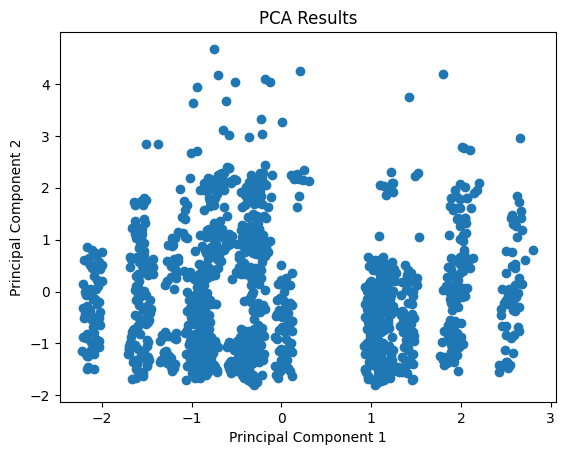

In [30]:
import matplotlib.pyplot as plt

plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()


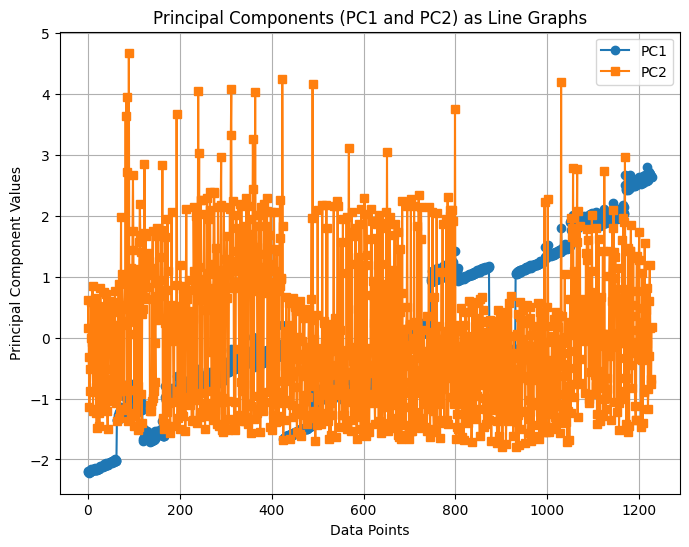

In [32]:
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.plot(principal_df['PC1'], label='PC1', marker='o')
plt.plot(principal_df['PC2'], label='PC2', marker='s')
plt.xlabel('Data Points')
plt.ylabel('Principal Component Values')
plt.title('Principal Components (PC1 and PC2) as Line Graphs')
plt.legend()
plt.grid(True)
plt.show()